In [1]:
import numpy as np 
import pandas as pd 

from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

import warnings
warnings.simplefilter(action='ignore')

# source: https://www.kaggle.com/mnassrib/titanic-logistic-regression-with-python

In [2]:
# Read CSV train data file into DataFrame
train_df = pd.read_csv("scripting_final.csv")

In [3]:
# preview train data
train_df.head()

,LearnerID,LearnerEmail,Score,ScorePerfect,StudyStatus,Years,Experience,OverallSatisfaction,LessonQuality,ValueImproveJob,KnowledgeBefore,KnowledgeAfter,Recommend,ImproveComments,Office,Region,Job,JobOverarching
0,2274,2274@company.com,100.0,1.0,Complete,1 -2 years,Not Much,3.0,3.0,3.0,3.0,3.0,3.0,.,Cleveland,Midwest,Review,Review
1,2277,2277@company.com,100.0,1.0,Complete,1 -2 years,Not Much,5.0,5.0,5.0,3.0,4.0,5.0,classroom training,Manila,Pacific,Review,Review
2,2304,2304@company.com,100.0,1.0,Complete,1 -2 years,Not Much,4.0,4.0,2.0,4.0,4.0,3.0,NaN,Nashville,Southeast,Review,Review
3,2314,2314@company.com,100.0,1.0,Complete,1 -2 years,Not Much,4.0,4.0,4.0,4.0,4.0,4.0,NONE,San Diego,Pacific,Review,Review
4,2316,2316@company.com,100.0,1.0,Complete,1 -2 years,Not Much,4.0,4.0,4.0,4.0,4.0,4.0,i wouldnt,Seattle,Pacific,Review,Review


In [4]:
## Get descriptive statistics of some of the fields
train_df.describe()

,LearnerID,Score,ScorePerfect,OverallSatisfaction,LessonQuality,ValueImproveJob,KnowledgeBefore,KnowledgeAfter,Recommend
count,5337.000000,3649.000000,3649.000000,3638.000000,3638.000000,3638.000000,3638.000000,3638.000000,3638.000000
mean,2769.000000,78.562620,0.408879,3.759758,3.784222,3.809511,3.527213,3.724299,3.817207
std,1540.803524,22.753723,0.491694,0.927986,0.921681,0.937267,0.911360,0.869309,1.007730
min,101.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1435.000000,75.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,2769.000000,75.000000,0.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
75%,4103.000000,100.000000,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000
max,5437.000000,100.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


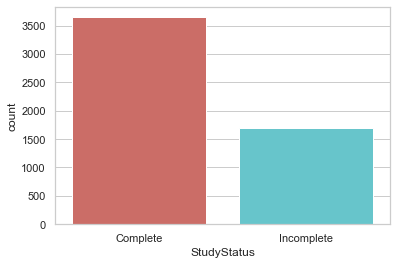

<Figure size 432x288 with 0 Axes>

In [5]:
# Plot to show how many completed the assessment
sns.countplot(x='StudyStatus',data=train_df, palette='hls')
plt.show()
plt.savefig('count_plot')


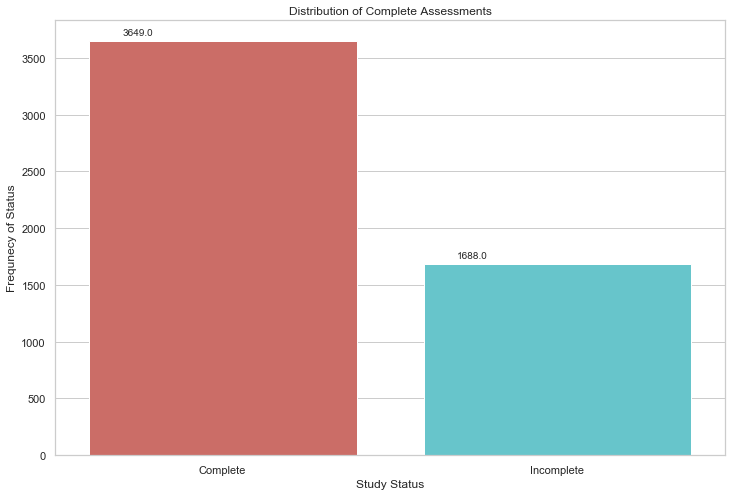

In [6]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x='StudyStatus',data=train_df, palette='hls')
plt.title('Distribution of Complete Assessments')
plt.xlabel('Study Status')
plt.ylabel('Frequnecy of Status')

for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

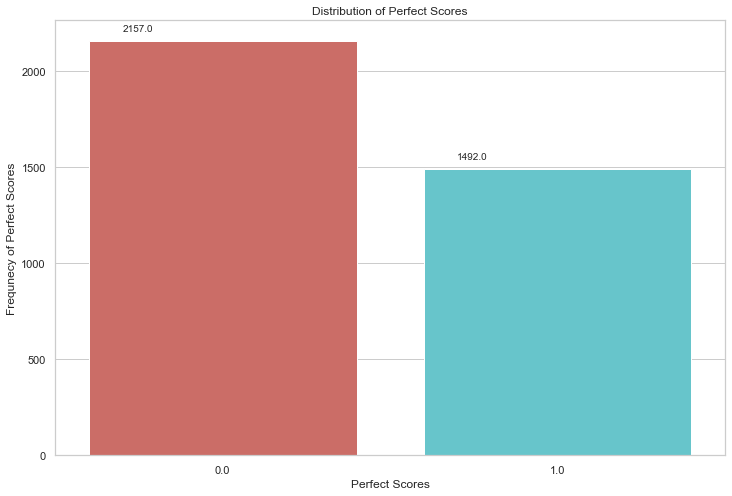

In [7]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x='ScorePerfect',data=train_df, palette='hls')
plt.title('Distribution of Perfect Scores')
plt.xlabel('Perfect Scores')
plt.ylabel('Frequnecy of Perfect Scores')

for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

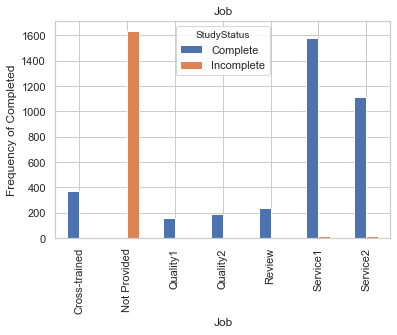

In [8]:
ax = pd.crosstab(train_df.Job,train_df.StudyStatus).plot(kind='bar')
plt.title('Job')
plt.xlabel('Job')
plt.ylabel('Frequency of Completed')
plt.savefig('job_compl')

<Figure size 864x576 with 0 Axes>

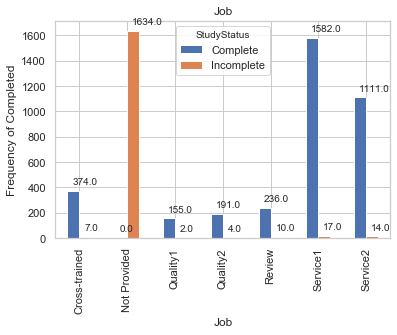

In [9]:
plt.figure(figsize=(12,8))
ax = pd.crosstab(train_df.Job,train_df.StudyStatus).plot(kind='bar')
plt.title('Job')
plt.xlabel('Job')
plt.ylabel('Frequency of Completed')
plt.savefig('job_compl')

for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

<Figure size 864x576 with 0 Axes>

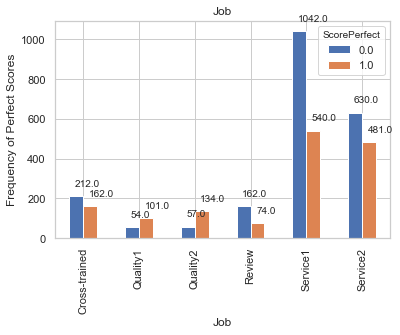

In [10]:
plt.figure(figsize=(12,8))
ax = pd.crosstab(train_df.Job,train_df.ScorePerfect).plot(kind='bar')
plt.title('Job')
plt.xlabel('Job')
plt.ylabel('Frequency of Perfect Scores')
plt.savefig('job_compl')

for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

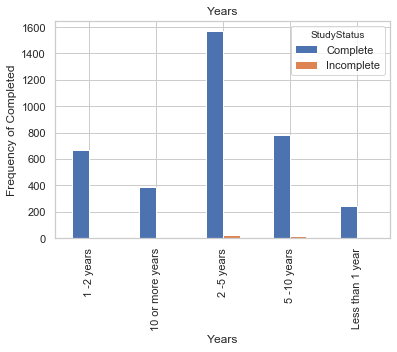

In [11]:
pd.crosstab(train_df.Years,train_df.StudyStatus).plot(kind='bar')
plt.title('Years')
plt.xlabel('Years')
plt.ylabel('Frequency of Completed')
plt.savefig('years_compl')

<Figure size 864x576 with 0 Axes>

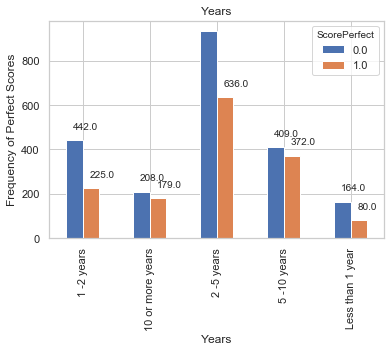

In [12]:
plt.figure(figsize=(12,8))
ax = pd.crosstab(train_df.Years,train_df.ScorePerfect).plot(kind='bar')
plt.title('Years')
plt.xlabel('Years')
plt.ylabel('Frequency of Perfect Scores')
plt.savefig('job_compl')

for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

<Figure size 1152x864 with 0 Axes>

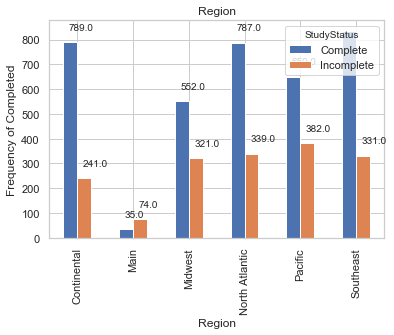

In [13]:
plt.figure(figsize=(16,12))
ax = pd.crosstab(train_df.Region,train_df.StudyStatus).plot(kind='bar')
plt.title('Region')
plt.xlabel('Region')
plt.ylabel('Frequency of Completed')
plt.savefig('region2_compl')

for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

<Figure size 864x576 with 0 Axes>

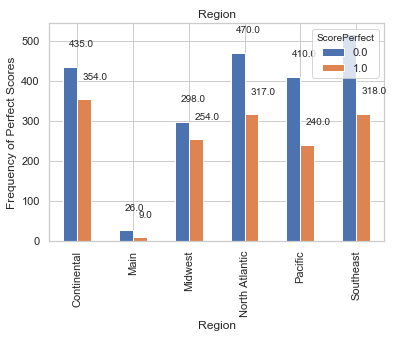

In [14]:
plt.figure(figsize=(12,8))
ax = pd.crosstab(train_df.Region,train_df.ScorePerfect).plot(kind='bar')
plt.title('Region')
plt.xlabel('Region')
plt.ylabel('Frequency of Perfect Scores')
plt.savefig('reg_compl')

for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

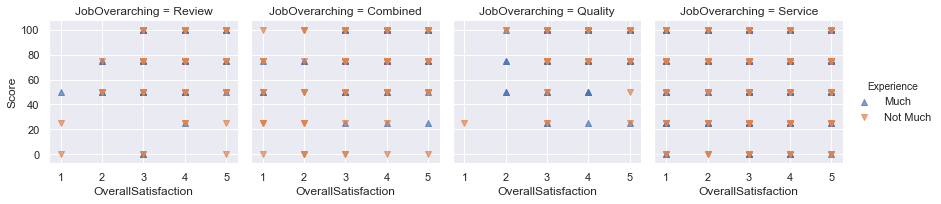

In [15]:
# trellis/lattice plot attendance by temp, conditioning on skies 
# and day_night with bobblehead NO/YES shown in distinct colors

sns.set(style="darkgrid")

g = sns.FacetGrid(train_df, col="JobOverarching", hue="Experience", 
                  hue_order=["Much", "Not Much"],
                  hue_kws=dict(marker=["^", "v"]))
g.map(plt.scatter, "OverallSatisfaction", "Score", alpha=.7)
g.add_legend();
plt.show()

In [16]:
# Remove any blank scores

train_df.dropna(subset = ["Score"], inplace=True)

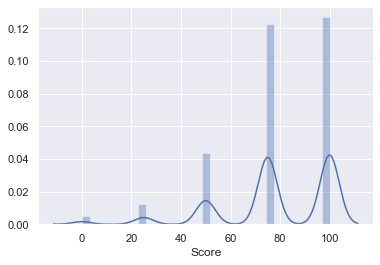

In [17]:
# Get the distribution of scores

sns.distplot(train_df["Score"] )

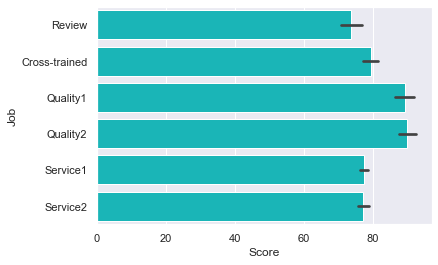

In [18]:
# Get the average score by Job

ax = sns.barplot(x="Score", y= "Job", data=train_df, color = 'darkturquoise')
plt.show()



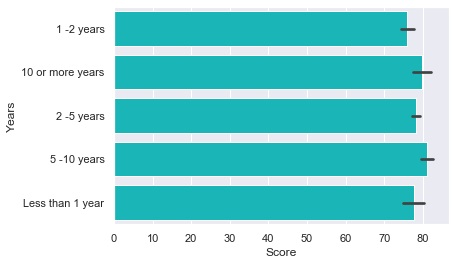

In [19]:
#sns.barplot('Years', 'Score', data=train_df, color="darkturquoise")
ax = sns.barplot(x="Score", y= "Years", data=train_df, color = 'darkturquoise')
plt.show()


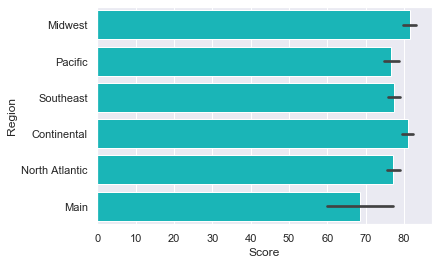

In [20]:
#sns.barplot('Years', 'Score', data=train_df, color="darkturquoise")
ax = sns.barplot(x="Score", y= "Region", data=train_df, color = 'darkturquoise')
plt.show()

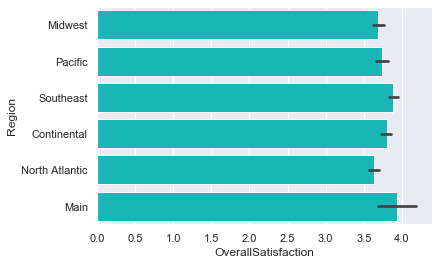

In [73]:
ax = sns.barplot(x="OverallSatisfaction", y= "Region", data=train_df, color = 'darkturquoise')
plt.show()

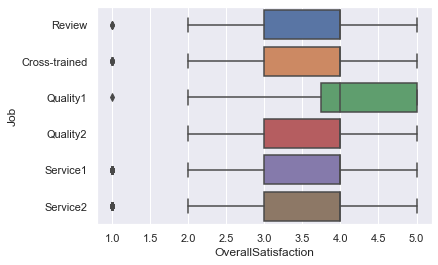

In [72]:
sns.boxplot(x='OverallSatisfaction', y='Job', data=train_df)

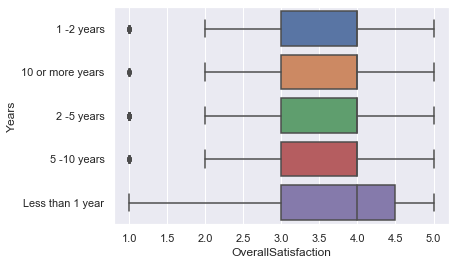

In [71]:
sns.boxplot(x='OverallSatisfaction', y='Years', data=train_df)

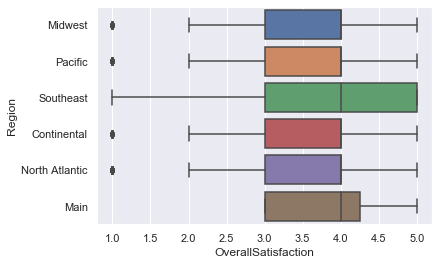

In [70]:
sns.boxplot(x='OverallSatisfaction', y='Region', data=train_df)

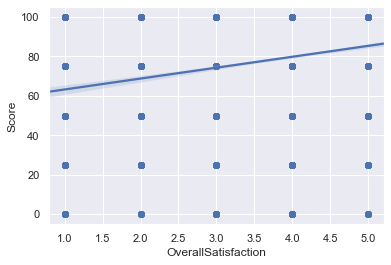

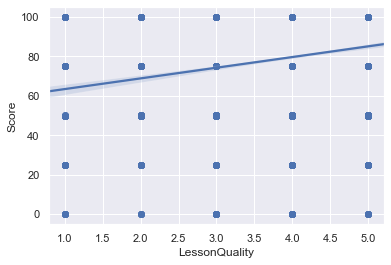

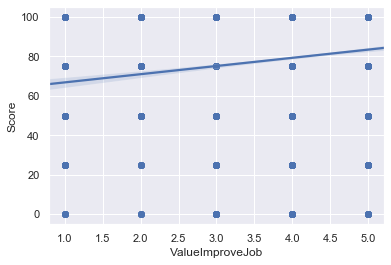

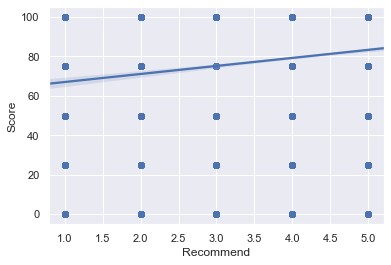

In [24]:
# QUICK SCATTER PLOT TO LOOK AT RELATIONSHIP BETWEEN VARIABLES

sns.set(color_codes=True)

sns.regplot(x="OverallSatisfaction", y="Score", data=train_df, y_jitter=0.03)
plt.show()


sns.set(color_codes=True)

sns.regplot(x="LessonQuality", y="Score", data=train_df, y_jitter=0.03)
plt.show()


sns.set(color_codes=True)

sns.regplot(x="ValueImproveJob", y="Score", data=train_df, y_jitter=0.03)
plt.show()

sns.set(color_codes=True)

sns.regplot(x="Recommend", y="Score", data=train_df, y_jitter=0.03)
plt.show()




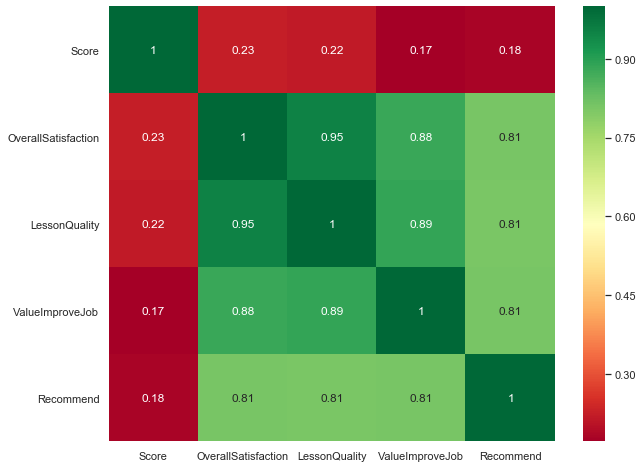

In [25]:
#initial correlation plot

Selected_features = ['Score','OverallSatisfaction','LessonQuality','ValueImproveJob','Recommend']
X = train_df[Selected_features]

plt.subplots(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

In [26]:
# Which variables are most correlated with a perfect score
from scipy.stats import uniform #for training and test splits
import statsmodels.api as smf #R-like model specification
import matplotlib.pyplot as plt #2D plotting

%matplotlib inline

# import packages for text processing and machine learning
import statsmodels.formula.api as smf  # R-like model specification
import patsy  # translate model specification into design matrices

import seaborn as sns  # PROVIDES TRELLIS AND SMALL MULTIPLE PLOTTING

# import user-defined module
#import evaluate_classifier as eval

In [27]:
import statsmodels.api as sm

In [28]:
train_df.head()

,LearnerID,LearnerEmail,Score,ScorePerfect,StudyStatus,Years,Experience,OverallSatisfaction,LessonQuality,ValueImproveJob,KnowledgeBefore,KnowledgeAfter,Recommend,ImproveComments,Office,Region,Job,JobOverarching
0,2274,2274@company.com,100.0,1.0,Complete,1 -2 years,Not Much,3.0,3.0,3.0,3.0,3.0,3.0,.,Cleveland,Midwest,Review,Review
1,2277,2277@company.com,100.0,1.0,Complete,1 -2 years,Not Much,5.0,5.0,5.0,3.0,4.0,5.0,classroom training,Manila,Pacific,Review,Review
2,2304,2304@company.com,100.0,1.0,Complete,1 -2 years,Not Much,4.0,4.0,2.0,4.0,4.0,3.0,NaN,Nashville,Southeast,Review,Review
3,2314,2314@company.com,100.0,1.0,Complete,1 -2 years,Not Much,4.0,4.0,4.0,4.0,4.0,4.0,NONE,San Diego,Pacific,Review,Review
4,2316,2316@company.com,100.0,1.0,Complete,1 -2 years,Not Much,4.0,4.0,4.0,4.0,4.0,4.0,i wouldnt,Seattle,Pacific,Review,Review


In [29]:
# specify model for logisitc regression
new1 = 'ScorePerfect ~ Job + Years + Region'
# ----------------------------------
# fit logistic regression model 
# ----------------------------------
# convert R-like formula into design matrix needed for statsmodels        
y,x = patsy.dmatrices(new1, train_df, return_type = 'dataframe')    

my_logit_model = sm.Logit(y,x)
# fit the model to the full data set
my_logit_model_fit = my_logit_model.fit()
print(my_logit_model_fit.summary())

# predicted probability of reponding to the offer
train_df['pred_logit_prob'] = my_logit_model_fit.predict(linear = False)

Optimization terminated successfully.
         Current function value: 0.650586
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:           ScorePerfect   No. Observations:                 3649
Model:                          Logit   Df Residuals:                     3634
Method:                           MLE   Df Model:                           14
Date:                Mon, 09 Mar 2020   Pseudo R-squ.:                 0.03823
Time:                        19:32:45   Log-Likelihood:                -2374.0
converged:                       True   LL-Null:                       -2468.4
Covariance Type:            nonrobust   LLR p-value:                 1.086e-32
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    -0.3016      0.147     -2.051      0.040      -0.

In [30]:
## Now view comments

comments = train_df[['ImproveComments']]

In [31]:
comments.head()

,ImproveComments
0,.
1,classroom training
2,NaN
3,NONE
4,i wouldnt


In [32]:
comments.dropna()

,ImproveComments
0,.
1,classroom training
3,NONE
4,i wouldnt
5,It was good- I wouldnt change anything
7,I think the training should be longer
10,No changes needed
13,I missed the VBMS page in the file
14,Difficult to navigate between DD214 and BIRLS ...
16,The delivery was great


In [33]:
len(comments)

3649

In [34]:
comments.dtypes


ImproveComments    object
dtype: object

In [35]:

# remove punctuation
comments['ImproveComments'] = comments['ImproveComments'].str.replace('[^\w\s]',' ')
comments['ImproveComments'].head()

0                      
1    classroom training
2                   NaN
3                  NONE
4             i wouldnt
Name: ImproveComments, dtype: object

In [36]:
#remove digits
comments['ImproveComments'] = comments['ImproveComments'].str.replace('[0-9]+','')
comments[['ImproveComments']].head()

,ImproveComments
0,
1,classroom training
2,NaN
3,NONE
4,i wouldnt


In [37]:
comments['ImproveComments'] = comments['ImproveComments'].str.replace('[â€¢]','')
comments[['ImproveComments']].head()

,ImproveComments
0,
1,classroom training
2,NaN
3,NONE
4,i wouldnt


In [38]:
# lowercase
comments['ImproveComments'] = comments['ImproveComments'].str.lower()
comments[['ImproveComments']].head()

,ImproveComments
0,
1,classroom training
2,NaN
3,none
4,i wouldnt


In [39]:
comments = comments.to_string()
print(comments)

                                        ImproveComments
0                                                      
1                                    classroom training
2                                                   NaN
3                                                  none
4                                             i wouldnt
5               it was good   i wouldnt change anything
6                                                   NaN
7                 i think the training should be longer
8                                                   NaN
9                                                   NaN
10                                    no changes needed
11                                                  NaN
12                                                  NaN
13                   i missed the vbms page in the file
14    difficult to navigate between dd and birls vid...
15                                                  NaN
16                               the delivery wa

In [40]:
import codecs

f = open('projectcomments.txt','w')
f.write(comments)
f.close()

In [41]:

text = open('projectcomments.txt')

In [42]:
improvetext = text.read()

In [43]:
len(improvetext)

204399

In [44]:
# normalize data
from string import punctuation

# remove numeric digits
improvewords = ''.join(c for c in improvetext if not c.isdigit())

punctuation = r"""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""

# remove punctuation and make lower case
improvewords = ''.join(c for c in improvewords if c not in punctuation).lower()

# print the normalized text

print (improvewords)

                                        improvecomments
                                                      
                                    classroom training
                                                   nan
                                                  none
                                             i wouldnt
               it was good   i wouldnt change anything
                                                   nan
                 i think the training should be longer
                                                   nan
                                                   nan
                                    no changes needed
                                                  nan
                                                  nan
                   i missed the vbms page in the file
    difficult to navigate between dd and birls vid
                                                  nan
                               the delivery was great
                   

In [45]:
from IPython.core.display import HTML

In [46]:
import nltk
from nltk.tokenize import word_tokenize
from nltk import FreqDist
from bs4 import BeautifulSoup
import string
from nltk.corpus import stopwords 
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from textblob import TextBlob
import matplotlib.pyplot as plt

import sklearn
import re
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import numpy as np


from sklearn.feature_extraction.text import CountVectorizer



# We need the punkt library to tokenize the text
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Kostyrka.Elia\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [47]:
# Tokenize the text into individual words
words = nltk.tokenize.word_tokenize(improvewords)

In [48]:
# Get the frequency distribution of the words into a data frame
fdist = FreqDist(words)
count_frame = pd.DataFrame(fdist, index =[0]).T
count_frame.columns = ['Count']
count_frame = count_frame.sort_values('Count', ascending=False)

In [49]:
# visualize word freq
%matplotlib inline

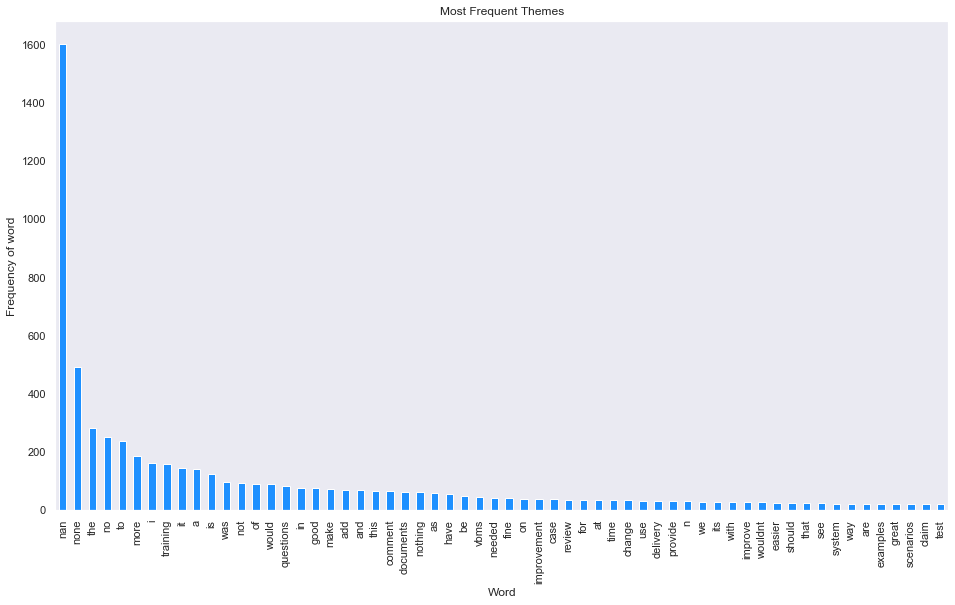

In [50]:
fig = plt.figure(figsize=(16, 9))
ax = fig.gca()    
count_frame['Count'][:60].plot(kind = 'bar', ax = ax, color='dodgerblue')
ax.set_title('Most Frequent Themes')
ax.set_ylabel('Frequency of word')
ax.set_xlabel('Word')
ax.grid()
plt.show()

In [51]:
# remove stopwords
# Get a set of common stopwords from NLTK
nltk.download("stopwords")
from nltk.corpus import stopwords

# remove stopwords from the text
usefulTxt = ' '.join([word for word in improvewords.split() if word not in (stopwords.words('english'))])
print("\n")
print(usefulTxt)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kostyrka.Elia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!




improvecomments classroom training nan none wouldnt good wouldnt change anything nan think training longer nan nan changes needed nan nan missed vbms page file difficult navigate dd birls vid nan delivery great comment none training fine nan nan fine nan nan nan would provide user friendly navigatio opinion make easy get signed terri none would change thing nan nan combined pdf case info litt recommendations nan get rid nan training none please make training folder view none wouldnt fine least three case studies one nan nan nan nan good go review system compliance include iss none nan nan make easier keep screens open nan using real systmes improvement needed nan nan provide scenarios different veterans f none adding audio requested nan none great sure time add instruction nan improvements nan nan none nan nan nan nan nan nan training require depth ques rather clear cut nan xx nan nothing note none need improve good training nan nan nothing nan nan nothing add recording larger font a

In [52]:
# Get the frequency distribution of the remaining words
usefulWords = nltk.tokenize.word_tokenize(usefulTxt)
fdist = FreqDist(usefulWords)
count_frame = pd.DataFrame(fdist, index =[0]).T
count_frame.columns = ['Count']

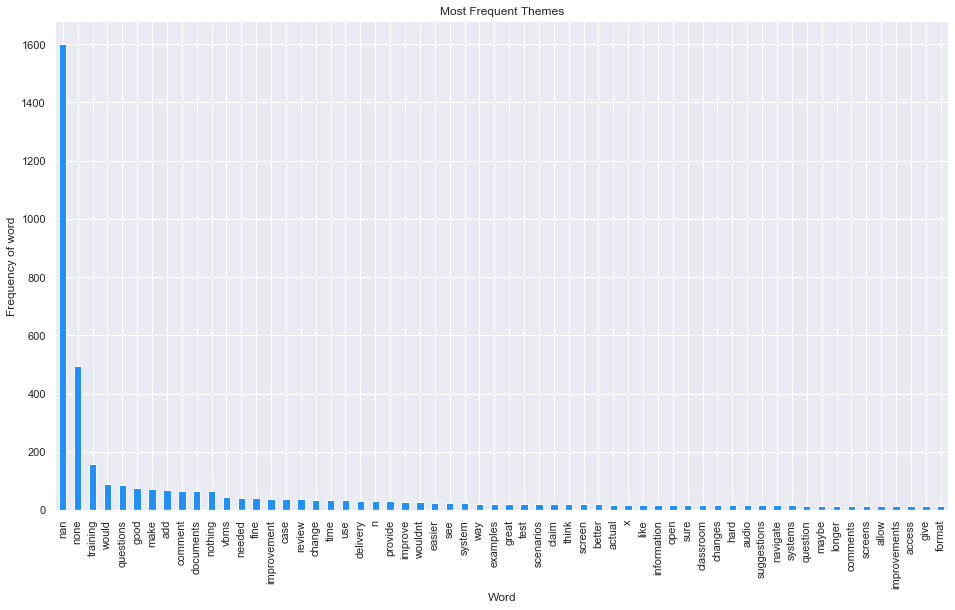

In [53]:
# Plot the frequency of the top 60 words
counts = count_frame.sort_values('Count', ascending = False)
fig = plt.figure(figsize=(16, 9))
ax = fig.gca()    
counts['Count'][:60].plot(kind = 'bar', ax = ax, color='dodgerblue')
ax.set_title('Most Frequent Themes')
ax.set_ylabel('Frequency of word')
ax.set_xlabel('Word')
plt.show()

In [54]:
# remove additional words
# remove stopwords
# Get a set of common stopwords from NLTK
nltk.download("stopwords")
from nltk.corpus import stopwords

morewords = ['nan','none','would','nothing','vbms','improvement','provide','wouldnt','improve','veteran']
nltkstopwords = nltk.corpus.stopwords.words('english')
stopwords = nltkstopwords + morewords

# remove stopwords from the text
usefulTxt1 = ' '.join([word for word in improvewords.split() if word not in (stopwords)])
print("\n")
print(usefulTxt1)



improvecomments classroom training good change anything think training longer changes needed missed page file difficult navigate dd birls vid delivery great comment training fine fine user friendly navigatio opinion make easy get signed terri change thing combined pdf case info litt recommendations get rid training please make training folder view fine least three case studies one good go review system compliance include iss make easier keep screens open using real systmes needed scenarios different veterans f adding audio requested great sure time add instruction improvements training require depth ques rather clear cut xx note need good training add recording larger font adjustable easier navigation claims folder documents least cases seemed fine update program update training competently better examples detailed entirely sure emphasis federal records dev well change sure single sign access live classroom think intended ga add audio comments good instructor teach real claims b perh

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kostyrka.Elia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [55]:
# Get the frequency distribution of the remaining words
usefulWords1 = nltk.tokenize.word_tokenize(usefulTxt1)
fdist1 = FreqDist(usefulWords1)
count_frame = pd.DataFrame(fdist1, index =[0]).T
count_frame.columns = ['Count']

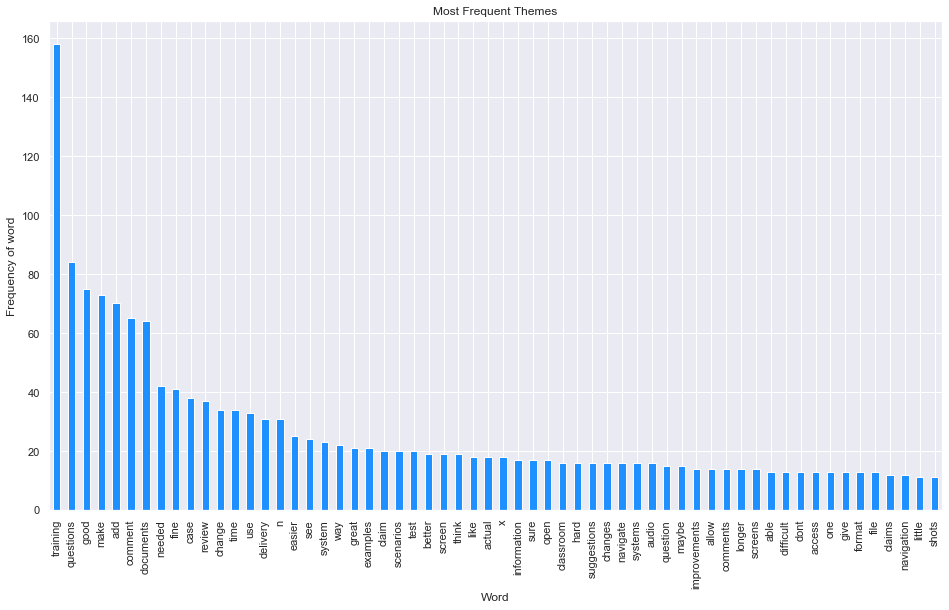

In [56]:
# Plot the frequency of the top 60 words
counts = count_frame.sort_values('Count', ascending = False)
fig = plt.figure(figsize=(16, 9))
ax = fig.gca()    
counts['Count'][:60].plot(kind = 'bar', ax = ax, color='dodgerblue')
ax.set_title('Most Frequent Themes')
ax.set_ylabel('Frequency of word')
ax.set_xlabel('Word')
plt.show()

In [57]:
# extracting n-grams
from nltk import ngrams

# Get n-grams where n = 2
n = 2
nGramsInDoc = []
nGrams = ngrams(usefulWords1, n)
for grams in nGrams:
    nWords = ' '.join(g for g in grams)
    nGramsInDoc.append(nWords)

In [58]:
# Count the frequency of each n-gram
fdist = FreqDist(nGramsInDoc)
count_frame = pd.DataFrame(fdist, index =[0]).T
count_frame.columns = ['Count']

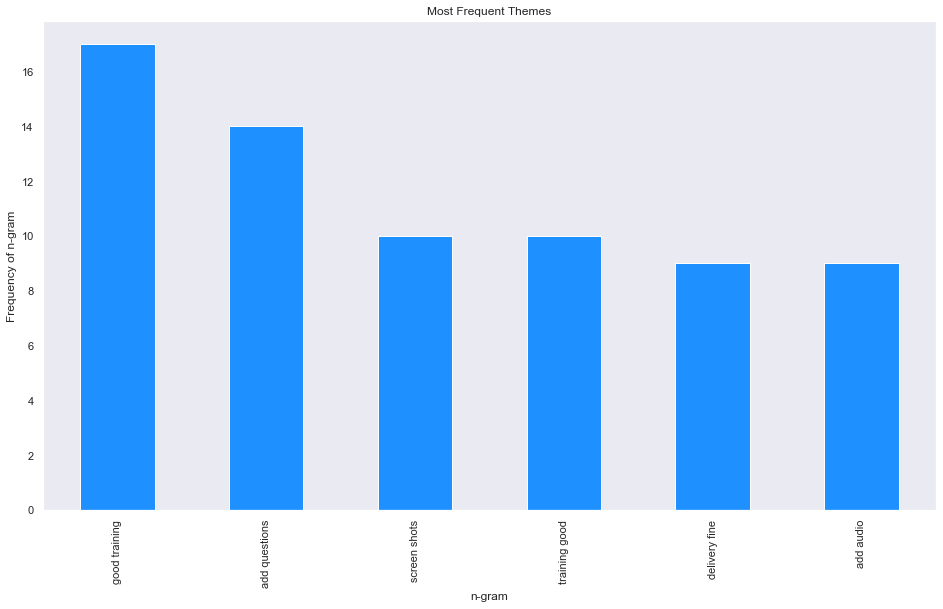

In [75]:
# Plot the frequency of the top 60 bigrams
counts = count_frame.sort_values('Count', ascending = False)
fig = plt.figure(figsize=(16, 9))
ax = fig.gca()    
counts['Count'][:6].plot(kind = 'bar', ax = ax, color='dodgerblue')
ax.set_title('Most Frequent Themes')
ax.set_ylabel('Frequency of n-gram')
ax.set_xlabel('n-gram')
ax.grid()
plt.show()